In [1]:
import pandas as pd
import numpy as np
from  sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from  sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers_BP.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Perform standard scaling while preprocessing data.

In [5]:
df.drop('CustomerID',axis=1,inplace =True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
#to covert male and female to  0 and 1  
encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])
gender_mappings ={index:label for index, label in enumerate(encoder.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [7]:
scaler = StandardScaler()
scaled_data =pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


# Find an optimal number of clusters by elbow method

In [8]:
max_clusters =  50

In [9]:
kmeans_tests =[KMeans(n_clusters=i, n_init =10) for i in range(1,max_clusters)]
inertias  = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

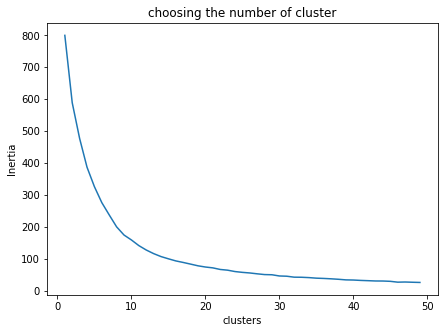

In [10]:
plt.figure(figsize=(7,5))
plt.plot(range(1,max_clusters),inertias)
plt.xlabel('clusters')
plt.ylabel('Inertia')
plt.title('choosing the number of cluster')
plt.show()

# Implement k means clustering

In [11]:
kmeans =KMeans(n_clusters =10,n_init =10)
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
clusters =kmeans.predict(scaled_data)
clusters

array([2, 2, 7, 8, 7, 8, 7, 8, 4, 8, 4, 8, 7, 8, 7, 2, 7, 2, 4, 8, 2, 2,
       7, 2, 7, 2, 7, 2, 7, 8, 4, 8, 4, 2, 7, 8, 7, 8, 7, 8, 3, 2, 4, 6,
       7, 8, 3, 6, 6, 6, 3, 2, 6, 4, 3, 4, 3, 4, 6, 4, 4, 2, 3, 3, 4, 2,
       3, 3, 2, 6, 4, 3, 3, 3, 4, 2, 3, 2, 6, 3, 4, 2, 4, 3, 6, 4, 3, 6,
       6, 3, 3, 2, 4, 6, 6, 2, 3, 6, 4, 2, 6, 3, 4, 2, 4, 6, 3, 4, 4, 4,
       4, 6, 6, 2, 6, 6, 3, 3, 3, 3, 2, 6, 6, 9, 6, 0, 5, 9, 4, 9, 5, 9,
       6, 0, 5, 0, 1, 9, 5, 0, 1, 9, 6, 0, 5, 9, 5, 0, 1, 9, 5, 9, 1, 0,
       1, 0, 5, 0, 5, 0, 3, 0, 5, 0, 5, 0, 5, 0, 1, 9, 5, 9, 5, 9, 1, 0,
       5, 9, 5, 9, 1, 0, 5, 0, 1, 9, 1, 9, 1, 0, 1, 0, 5, 0, 1, 0, 1, 9,
       5, 9])

In [13]:
pca = PCA(n_components=2)

reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1', 'PC2'])

In [14]:
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [15]:
kmeans.cluster_centers_

array([[-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.88640526, -0.78153925, -0.12214217, -0.11957041],
       [-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667]])

In [16]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[-1.38150389,  0.3644368 ],
       [ 0.81659377,  0.24505923],
       [-0.68838314,  0.28733559],
       [ 0.58233488, -0.85939176],
       [ 1.5303687 ,  0.17028966],
       [ 1.19961046,  1.30582744],
       [-0.662429  , -0.58044771],
       [ 0.75229959, -1.61087948],
       [-1.6696024 , -1.35294268],
       [-0.88272588,  1.65431318]])

In [17]:
reduced_data['cluster'] = clusters

In [18]:
reduced_data


,PC1,PC2,cluster
0,-0.406383,-0.520714,2
1,-1.427673,-0.367310,2
2,0.050761,-1.894068,7
3,-1.694513,-1.631908,8
4,-0.313108,-1.810483,7
...,...,...,...
195,-1.179572,1.324568,0
196,0.672751,1.221061,1
197,-0.723719,2.765010,9
198,0.767096,2.861930,5


# Implement hierarchical clustering by taking 5 clusters.¶

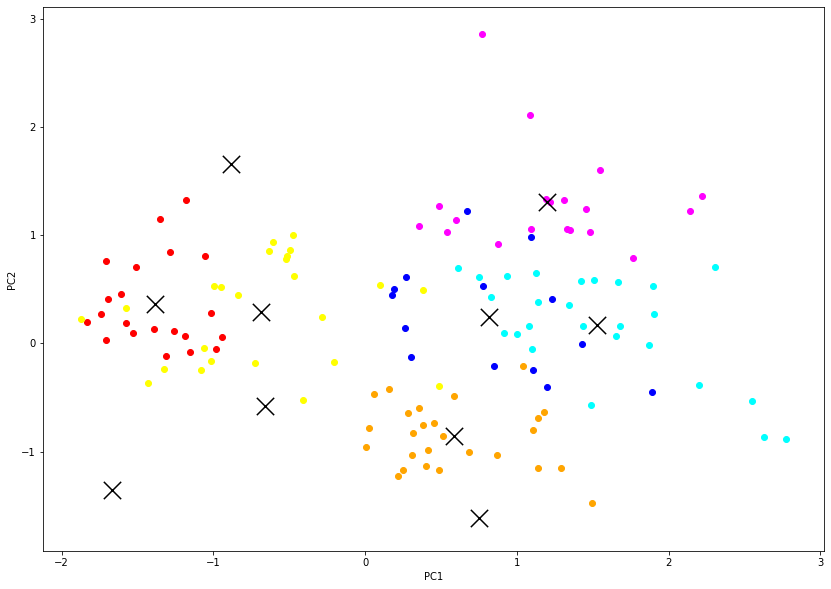

In [19]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

# For the same data, draw dendrogram to find an optimal number of clusters.

In [20]:
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

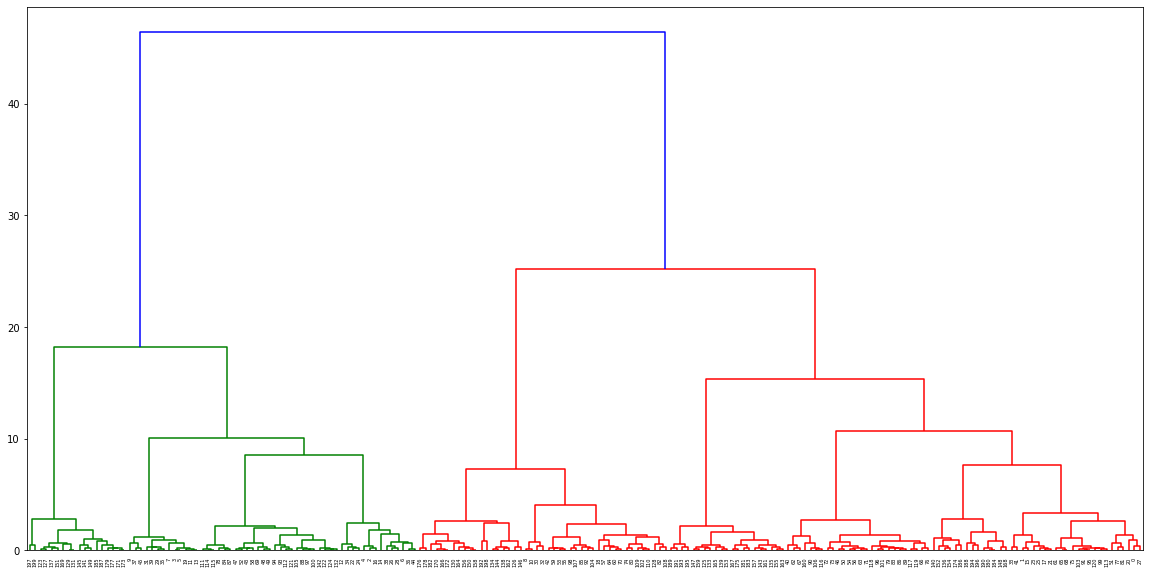

In [22]:
dendrogram =sch.dendrogram(sch.linkage(reduced_data,method='ward'))
plt.rcParams['figure.figsize']=(20,10)